In [89]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('500_movie.csv')
df.head()

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,b_mev,r_vm,g_vm,b_vm,r_vme,g_vme,b_vme,r_vv,g_vv,b_vv
0,95,1,1,0,0,0,0,0,0,0,...,1766.918971,1378.656597,1226.597393,1312.536205,1020.329610,1058.232838,1266.721188,1.576446e+06,1.063934e+06,9.811321e+05
1,101,0,1,0,0,1,1,0,0,0,...,871.299983,4246.155438,3485.626104,3657.906670,4137.394317,3282.222338,3465.663370,1.977189e+06,1.278774e+06,1.379255e+06
2,104,0,0,0,0,1,0,0,0,0,...,1500.727996,3343.001955,3278.462491,3495.961370,3268.545630,3223.389569,3570.054223,1.797467e+06,1.340866e+06,1.316783e+06
3,111,0,0,0,0,0,1,0,1,0,...,1538.276964,1469.209907,1906.219460,2168.726701,1079.160719,1750.140648,2042.958889,1.497629e+06,1.443353e+06,1.697073e+06
4,122,0,0,0,0,1,0,0,0,0,...,573.825228,2791.582391,2359.830953,2347.339062,2922.914032,2300.119795,2213.592882,1.471828e+06,1.567428e+06,1.340312e+06


In [5]:
df_act = df.loc[df['Action'] == 1]
df_dra = df.loc[df['Drama'] == 1]
print(len(df_act),len(df_dra))

95 163


In [69]:
df_new = pd.DataFrame(columns=df.columns)
count = 0
for i in range(len(df_act)):
    if df_act.iloc[i]['movieId'] not in list(df_dra['movieId']):
        df_new.loc[count] = df_act.iloc[i]
        count += 1
for i in range(len(df_dra)):
    if df_dra.iloc[i]['movieId'] not in list(df_act['movieId']):
        df_new.loc[count] = df_dra.iloc[i]
        count += 1
df_new.drop(columns = ['Adventure', 'Animation', 'Children', 'Comedy', 'Crime','Documentary','Fantasy', \
                      'Film_Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', \
                       'Western', 'youtubeId','Drama','movieId'], inplace = True)
df_new['Action'] = df_new['Action'].astype(int)
df_new.head()

,Action,movie_title,movie_year,director_name,duration,actor_2_name,actor_1_name,actor_3_name,facenumber_in_poster,country,...,b_mev,r_vm,g_vm,b_vm,r_vme,g_vme,b_vme,r_vv,g_vv,b_vv
0,1,Broken Arrow,1996,John Woo,108.0,Samantha Mathis,Delroy Lindo,Bob Gunton,2.0,USA,...,1766.918971,1378.656597,1226.597393,1312.536205,1020.329610,1058.232838,1266.721188,1.576446e+06,1.063934e+06,9.811321e+05
1,1,Batman Forever,1995,Joel Schumacher,121.0,Rene Auberjonois,Michael Gough,Debi Mazar,4.0,USA,...,518.885877,1666.702016,1157.894937,1303.348357,1274.997773,964.954068,1136.426069,1.643317e+06,5.423056e+05,5.194663e+05
2,1,Desperado,1995,Robert Rodriguez,104.0,Steve Buscemi,Quentin Tarantino,Salma Hayek,0.0,USA,...,1460.620422,1466.438697,1541.976297,2001.214457,751.006394,969.567614,1417.869088,3.258192e+06,2.545405e+06,1.996926e+06
3,1,Tank Girl,1995,Rachel Talalay,104.0,Lori Petty,Naomi Watts,Jeff Kober,0.0,USA,...,1958.926599,1188.988990,1230.740513,1235.508235,926.410960,922.019522,936.960172,1.425629e+06,1.482036e+06,9.778643e+05
4,1,Tales from the Hood,1995,Rusty Cundieff,98.0,Clarence Williams III,Corbin Bernsen,David Alan Grier,0.0,USA,...,898.464434,1191.104657,1224.092641,1515.411123,853.562968,900.067431,1273.965339,1.172876e+06,1.007493e+06,9.691675e+05


In [103]:
X, y = df_new.drop(columns=['Action']), df_new['Action'].astype(int)
X = pd.get_dummies(X)

In [104]:
X_std = StandardScaler().fit_transform(X)

C:\Users\hanxiao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hanxiao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [105]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

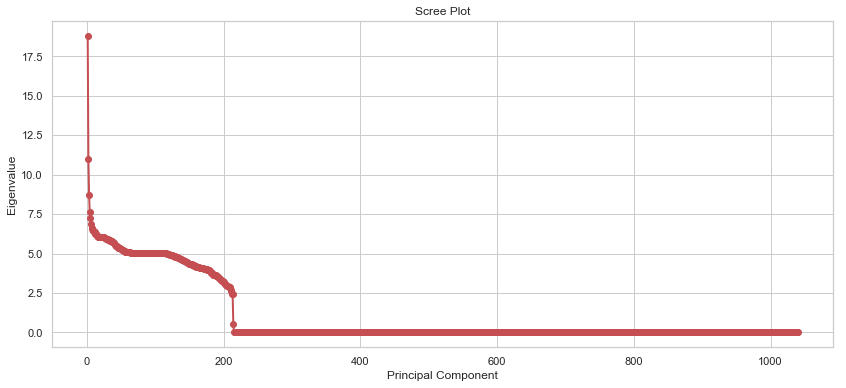

In [106]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

fig = plt.figure(figsize=(14,6))
sing_vals = np.arange(len(eig_vals)) + 1
plt.plot(sing_vals, [x for (x, _) in eig_pairs], 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [107]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals[:220], reverse=True)]
cum_var_exp = np.cumsum(var_exp)

C:\Users\hanxiao\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\transforms.py:827: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
C:\Users\hanxiao\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


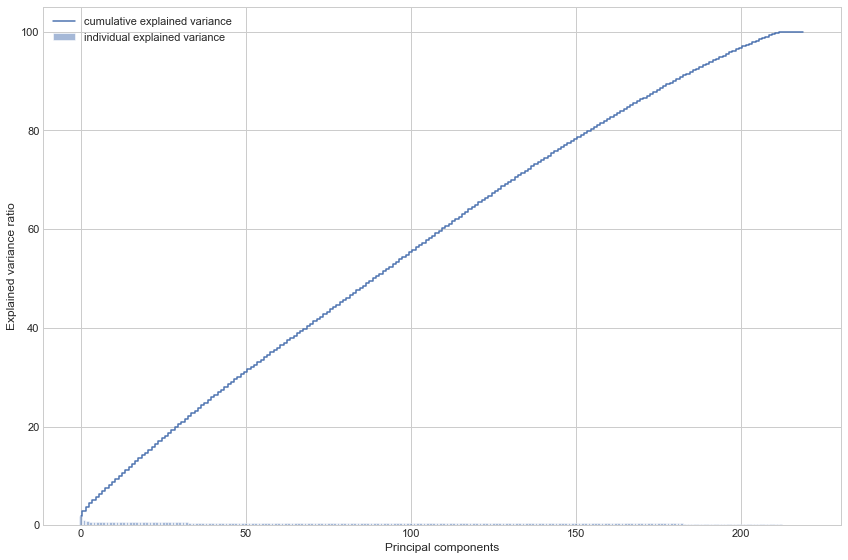

In [108]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))

    plt.bar(range(220), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.step(range(220), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [109]:
print('The total variance by using eigenvalues greater than 1.0 is',cum_var_exp[219], '%')

The total variance by using eigenvalues greater than 1.0 is (99.99999999999996+0j) %


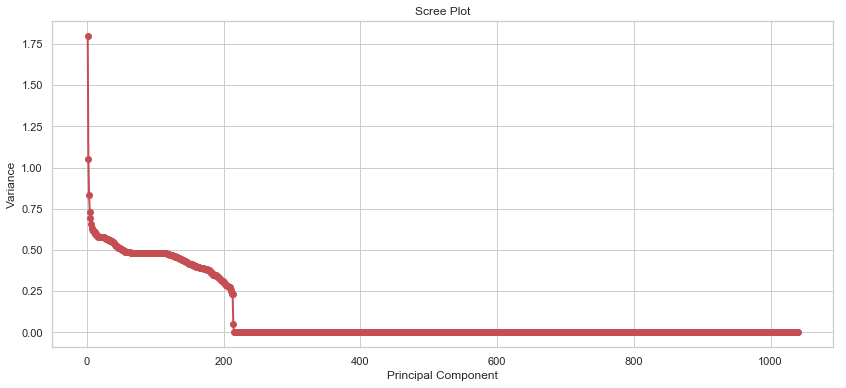

In [110]:
fig = plt.figure(figsize=(14,6))
sing_vals = np.arange(len(eig_vals)) + 1
plt.plot(sing_vals, [(i / tot)*100 for i in sorted(eig_vals, reverse=True)], 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.show()

In [117]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(len(X.columns),1),
                      eig_pairs[1][1].reshape(len(X.columns),1),
                      eig_pairs[2][1].reshape(len(X.columns),1)))

pd.DataFrame(matrix_w, index = X.columns, columns=['PC1','PC2','PC3'])

,PC1,PC2,PC3
duration,(-0.0037980820661461545+0j),(-0.006723295910071406+0j),(-0.04682691902544083+0j)
facenumber_in_poster,(0.009070246210905141+0j),(-0.05260873897971741+0j),(-0.04225263094762165+0j)
budget,(-0.0017440264462187933+0j),(0.03534807406036156+0j),(0.03696577222371753+0j)
imdb_score,(-0.012414518898765596+0j),(-0.010855175531016116+0j),(-0.07098145865650343+0j)
r_mm,(0.21134296322833135+0j),(-0.05231254051673768+0j),(0.04605874925861751+0j)
g_mm,(0.2123524986032918+0j),(-0.09367292567243639+0j),(0.031115914109731177+0j)
b_mm,(0.1968440118553205+0j),(-0.1145727402338734+0j),(-0.01181347479398449+0j)
r_mme,(0.2070665777338289+0j),(-0.08675455938849035+0j),(0.011601381256747381+0j)
g_mme,(0.2039312301065728+0j),(-0.12197368529792096+0j),(-0.0060660509841182+0j)
b_mme,(0.19062969614888667+0j),(-0.13359576970196388+0j),(-0.037871138199143416+0j)
